In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_portada.jpg" align="center" width="90%"/></div>
        <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div>
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 3</div>
            <div class="div-contenido">Regresión Lineal Múltiple</div>
        </div>
    </div>
</div>

### Repaso

---

En la clase pasada presentamos la regresión lineal como primer modelo de aprendizaje supervisado. 

En particular, la regresión lineal es una herramienta útil para predecir una respuesta cuantitativa. 

Ahora nos preguntamos **¿Podemos agregar más variables explicativas para mejorar nuestro modelo?**

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_intro.png" align="center"/>





### Agenda

---

- Regresión lineal múltiple

- Variables Dummies

- Normalización de Variables





<div class="div-dhds-fondo-1"> Regresión Lineal Múltiple
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_separador.png" align="center" />

</div>

### Regresión Lineal Múltiple

---

La clase pasada analizamos en caso del dataset `advertising`, examinamos la relación entre ventas y publicidad en TV. 

Ese dataset tiene también datos de publicidad en Diarios y en Radio.

En la práctica vamos a intentar usar más de una variable predictora con el objetivo de mejorar la performane de nuestro modelo. 

**¿Cómo podemos extender el análisis para incorporar predictores adicionales?**



Una opción es calcular tres regresiones lineales simples por separado, cada una usando un medio como predictor. 

Sin embargo esto no es del todo satisfactorio: 
    
1. No es claro cómo hacer una única predicción de ventas a partir de los 3 predictores ya que cada uno tiene una ecuación de regresión separada

2. Cada una de las regresiones simples ignora a los otros dos medios al estimar los coeficientes de regresión

Veremos que si los presupuestos de publicidad están correlacionados entre ellos en nuestro dataset, esto puede llevar a estimaciones erróneas de los efectos individuales de cada medio en las ventas. 

En lugar de ajustar un modelo distinto de regresión simple para cada predictor, una mejor aproximación es **extender el modelo de regresión simple para que puede incluir múltiples predictores**. 



### Regresión Lineal Múltiple

---

Supongamos que tenemos $p$ predictores distintos, entonces el modelo de regresión lineal múltiple toma la siguiente forma:

<p style="font-size:25px;">    
$$Y = \beta_0 + \beta_1. X_1 + \beta_2. X_2 + ... + \beta_p. X_p + \epsilon$$    
</p>


### Ejemplo de regresión lineal con dos predictores y una respuesta

---

La "línea" de regresión mínimo cuadrática se vuelve un plano. 

El plano buscado minimiza la suma de los cuadrados de las distancias entre cada observación y el plano.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_regresion_lineal_multiple.png" align="center"/>


### Estimadores y Predicción para regresión lineal múltiple

---

Dados estimadores de los coeficientes de pendiente podemos pronosticar la variable de respuesta para una observación con valores dados de los predictores como:
<p style="font-size:25px;">    
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}. x_1 + \hat{\beta_2}. x_2 + ... + \hat{\beta_p}. x_p $$
</p>

Elegimos los valores para los estimadores de los coeficientes  que minimizan la suma de residuos al cuadrado

<p style="font-size:25px;">
$$RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$
</p>
<p style="font-size:25px;">
$$\space \space \space  = \sum_{i=1}^{n}(y_i - \hat{\beta_0} - \hat{\beta_1}. x_{i1} - \hat{\beta_2}. x_{i2} - ... - \hat{\beta_p}. x_{ip} )^2$$
</p>



### Test de hipótesis sobre los coeficientes estimados

---

**¿Hay alguna relación entre la variable objetivo y todas las variables explicativas?**

$H_0: \beta_1 = \beta_2 = ... \beta_p = 0$

$H_1:$ al menos un $\beta_j \ne 0$



<div class = "Table" style="font-size:20px;" > 
<div class = "Row">
<div class = "Cell" style="width:60%;line-height:3.5;">

Usamos el estadístico F:

$$F = \frac{(TSS - RSS)/p}{RSS / (n - p - 1)}$$


Recordemos:

$$TSS = \sum_{i = 1}^{n}(y_i - \bar{y})^2$$

$$RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$

</div>
<div class = "Cell" style="vertical-align: middle;">
    <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_F.png" align="middle" />
</div>
</div>
</div>



### Interpretación

---

$X_j$ representa el predictor $j$ y $\beta_j$ cuantifica la asociación entre esa variable predictora y la respuesta Y. 

**Interpretamos $\beta_j$ como el efecto promedio en Y de un incremento unitario en Xj, manteniendo todos los otros predictores constantes**



### Ejemplo

---

Analicemos ahora el dataset `advertising` 

<p style="font-size:20px;">
$$Sales = \beta_0 + \beta_1 . TV + \beta_2 . Radio + \beta_3 . Newspaper + \epsilon$$
</p>

In [3]:
advertising_file_path = "../Data/advertising.csv"
advertising = pd.read_csv(advertising_file_path)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
import statsmodels.api as sm

feature_cols = ["TV", "Radio", "Newspaper"]

X = advertising[feature_cols]
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


In [5]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           8.13e-99
Time:                        18:44:17   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_advertising_coeficientes.png" align="center" />
 
Para el dataset `advertising`, los estimadores de coeficientes obtenidos por cuadrados mínimos para la regresión lineal múltiple, relacionan el número de unidades vendidas con el presupuesto de publicidad en radio tv y periódico
 
 
 

Comparemos los resultados obtenidos con la regresión lineal simple de Sales contra Newspaper


In [6]:
X_t = np.array(advertising.Newspaper, ndmin=2)
X = np.transpose(X_t)
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


In [7]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Mon, 12 Apr 2021   Prob (F-statistic):             0.0255
Time:                        18:44:17   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9595      0.638     21.870      0.0

Vemos que con un nivel de significancia de 0.05, el estimador del coeficiente para Newspaper no es significativo en la regresión lineal múltiple y sí lo es en la regresión lineal simple.

**¿Tiene sentido que la regresión lineal múltiple indique que no hay relación entre Sales y Newspaper mientras que la regresión lineal simple indica lo contrario?**

Consideremos la matriz de correlación para las tres variables predictoras y la variable respuesta.


In [8]:
correlations = np.corrcoef(np.transpose(advertising))
print(correlations)
print(advertising.columns)

[[1.         0.05480866 0.05664787 0.90120791]
 [0.05480866 1.         0.35410375 0.3496311 ]
 [0.05664787 0.35410375 1.         0.15796003]
 [0.90120791 0.3496311  0.15796003 1.        ]]
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


Notemos que la **correlación entre Radio y Newspaper es 0.35** 

La matriz de correlación revela que 

* En mercados donde gastamos más en Radio, Sales tiende a valores más altos 

* Tendencia a gastar más en publicidad en Newspaper en mercados donde se gasta más en publicidad en Radio

Ahora **supongamos que la regresión múltiple es correcta** y la publicidad en Newspaper no tiene impacto directo en Sales pero la publicidad en Radio incrementa Sales.

Cuando analizamos la regresión lineal simple, que sólo examina Sales vs. Newspaper, observamos que valores más grandes de Newspaper tienden a estar asociados con valores más altos de Sales, incluso aunque la publicidad en Newspaper no afecta a las ventas en Sales.

Podemos explicar esto considerando la correlación existente entre Newspaper y Radio: **La variable Newspaper puede esconder el efecto de la variable Radio**, es decir Newspaper recibe el "crédito" por los efectos de Radio en Sales.


### Multicolinealidad

---

En el **escenario ideal** los **predictores no están correlacionados**

Las correlaciones entre los predictores causan problemas:

La **varianza de los estimadores de los coeficientes tiende a aumentar**, a veces dramáticamente. Entonces **los estimadores de los coeficientes son menos precisos**. 




### Relación entre variable predictora y target

---

Dos de los supuestos básicos determinados por la forma del modelo lineal es que la relación entre cada predictor y el target es:

* **aditiva**: el efecto del cambio de $X_j$ sobre $Y$ es aditivo a los efectos de los otros predictores.

* **lineal**: el efecto del cambio en una unidad de $X_j$ sobre $Y$ es constante. 

Veremos muchos modelos a lo largo del curso que relajan estos supuestos. 

Veamos ahora dos formas de "relajarlos" dentro del marco de una regresión lineal.


En el ejemplo anterior, concluímos que TV y Radio tienen influencia sobre las ventas Sales.

Hasta aquí asumimos que el efecto de pautar en TV sobre las ventas no dependía del gasto en publicidad en otros medios.

¿Y si esto no fuera así? 

**Si el gasto en TV incrementara también el efecto del gasto en Radio** quizás tendría más sentido repartir el gasto entre ambos medios en lugar de asignar el presupuesto entero a uno solo.

En marketing se llama a esto "efecto sinergia", en estadística se llama **interacción**


### Extendiendo el modelo lineal: Interacciones entre predictores cuantitativos

---

Una forma de modelar el efecto interacción es incluir un tercer predictor en el modelo: el **producto de los predictores**. Por ejemplo, $X_1$ * $X_2$

<p style="font-size:20px;">
$$Y = \beta_0 + \beta_1 . X_1 + \beta_2 . X_2 + \beta_3 . X_1 . X_2 + \epsilon$$
</p>

¿Cómo afecta esto al modelo? Relajando el supuesto de aditivididad podemos reescribir el modelo de la siguiente forma:

<p style="font-size:20px;">
$$Y = \beta_0 + (\beta_1 + \beta_3 . X_2) . X_1 + \beta_2 . X_2 + \epsilon$$
</p>

<p style="font-size:20px;">
$$\space  = \beta_0 +  \tilde{\beta_1} . X_1 + \beta_2 . X_2 + \epsilon$$
</p>

Ahora entonces 

* El efecto de $X_1$ sobre $Y$ no es constante, el cambio en una unidad de $X_1$ sobre $Y$ está afectado por el valor de $X_2$. 

* El efecto de $X_2$ sobre $Y$ no es constante, el cambio en una unidad de $X_2$ sobre $Y$ depende también del valor de $X_1$




### Interacciones entre predictores en `advertising`

---

Incluyendo un término de interacción el modelo quedaría 

<p style="font-size:20px;">
$$Sales = \beta_0 + \beta_1 . TV + \beta_2 . Radio + \beta_3 . Radio . TV + \epsilon$$
</p>
    
<p style="font-size:20px;">
$$\space = \beta_0 + (\beta_1 + \beta_3 . Radio) . TV + \beta_2 . Radio + \epsilon$$
</p>

Podemos interpretar $\beta_3$ como el incremento en la efectividad de la pauta en TV por cada unidad de incremento de la pauta en radio (o al revés).


Vamos a calcular la regresión lineal múltiple para Sales con variables predictoras TV y Radio, y comparar los resultados del modelo con y sin interacción entre estas variables predictoras.

#### Sin interaccion


In [9]:
feature_cols = ["TV", "Radio"]

X = advertising[feature_cols]
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model_no_interaccion = sm.OLS(y, X).fit()

In [10]:
print (model_no_interaccion.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.39e-100
Time:                        18:44:17   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

#### Con interaccion

In [11]:
advertising["TV_x_RADIO"] = advertising.TV * advertising.Radio

feature_cols = ["TV", "Radio", "TV_x_RADIO"]

X = advertising[feature_cols]
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model_interaccion = sm.OLS(y, X).fit()


In [12]:
print (model_interaccion.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     694.7
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          3.90e-104
Time:                        18:44:17   Log-Likelihood:                -370.83
No. Observations:                 200   AIC:                             749.7
Df Residuals:                     196   BIC:                             762.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1926      0.410     15.101      0.0


El p-value para el término de interacción es muy bajo, lo cual sugiere que hay evidencia para rechazar que $\beta_3$ es igual a cero en la población.

$R^2$ es 91.4 %, comparado con el 90.3%  del modelo solo con efectos principales, entonces el modelo con el efecto de interacción es "superior" al que solo contiene los efectos principales.


### Interacciones entre predictores cuantitativos

---

Puede suceder que los términos principales no sean significativos, mientras que los términos de interacción sí lo sean.

El **principio jerárquico** plantea que si incluimos interacciones en un modelo también debemos incluir los efectos principales, aún si los coeficientes de estos últimos no son estadísticamente significativos. 

### Extendiendo el modelo lineal: Relaciones no lineales

---

Podemos generar un variables nuevas, elevando las existentes a alguna potencia:

<p style="font-size:20px;">
$$Sales = \beta_0 + \beta_1 . TV + \beta_2 . TV ^ 2 + \epsilon$$
</p>


**El modelo sigue siendo lineal**, porque es lineal en los parámetros.




Vamos a comparar ahora el modelo de regresión lineal simple que relaciona Sales con TV, y los modelos de regresión lineal que incluyen TV elevado a alguna potencia.

#### Regresión Lineal Simple

In [13]:
X_t = np.array(advertising.TV, ndmin=2)
X = np.transpose(X_t)
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


In [14]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           7.93e-74
Time:                        18:44:17   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

#### Regresión Lineal Múltiple

In [15]:
advertising["TV_2"] = advertising.TV * advertising.TV 
advertising["TV_3"] = advertising.TV * advertising.TV_2 
advertising["TV_4"] = advertising.TV * advertising.TV_3 
advertising["TV_5"] = advertising.TV * advertising.TV_4 

feature_cols = ["TV", "TV_2", "TV_3", "TV_4", "TV_5"]

X = advertising[feature_cols]
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


In [16]:
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           3.77e-74
Time:                        18:44:17   Log-Likelihood:                -435.40
No. Observations:                 200   AIC:                             882.8
Df Residuals:                     194   BIC:                             902.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9107      0.934      3.117      0.0

Comparando los dos modelos vemos que el valor de $R^2$ es mejor para el modelo que incluye $TV^5$ que para el modelo de regresión lineal simple.

Sin embargo, tenemos este warning que nos indica que el modelo puede tener problemas multicolinealidad:
<code>
[2] The condition number is large, 3.99e+12. This might indicate that there are strong multicollinearity or other numerical problems.
</code>

Y el p-value obtenido para todos los coeficientes indican que hay evidencia para rechazar que $\beta_2$ $\beta_3$ $\beta_4$ y $\beta_5$ sean igual a cero.

Vamos a graficar ahora los modelos obtenidos usando $TV$, $TV^2$, ..., $TV^5$

In [17]:
predictions = pd.DataFrame()

predictions["X"] = advertising.TV
#verdadero valor de Y
predictions["Y"] = advertising.Sales 

for i in range(1, 6):
    
    feature_cols = []

    for j in range(1, i+1):
        if j == 1:
            col_name = "TV"
        else:
            col_name = "TV_" + str(j)

        feature_cols.append(col_name)
        

    X_i = advertising[feature_cols]
        
    y_i = advertising.Sales

    # Tenemos que agregar explícitamente a una constante:
    X_i = sm.add_constant(X_i)

    model_i = sm.OLS(y, X_i).fit()
    predictions["model_" + str(i)] = model_i.predict(X_i)
    
        
predictions.head()

,X,Y,model_1,model_2,model_3,model_4,model_5
0,230.1,22.1,19.737265,19.732473,19.717700,20.046845,19.888122
1,44.5,10.4,9.443004,9.228955,9.238345,9.675762,10.377322
2,17.2,12.0,7.928816,7.200292,7.185303,7.101305,7.322178
3,151.5,16.5,15.377734,15.984230,15.984171,15.569757,15.619815
4,180.8,17.9,17.002852,17.501688,17.490649,17.237724,17.772569


In [18]:
data_to_plot = pd.melt(predictions, id_vars = ["X"], 
                       value_vars = ['Y', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5'])
data_to_plot["size"] = 10
data_to_plot.head()

,X,variable,value,size
0,230.1,Y,22.1,10
1,44.5,Y,10.4,10
2,17.2,Y,12.0,10
3,151.5,Y,16.5,10
4,180.8,Y,17.9,10


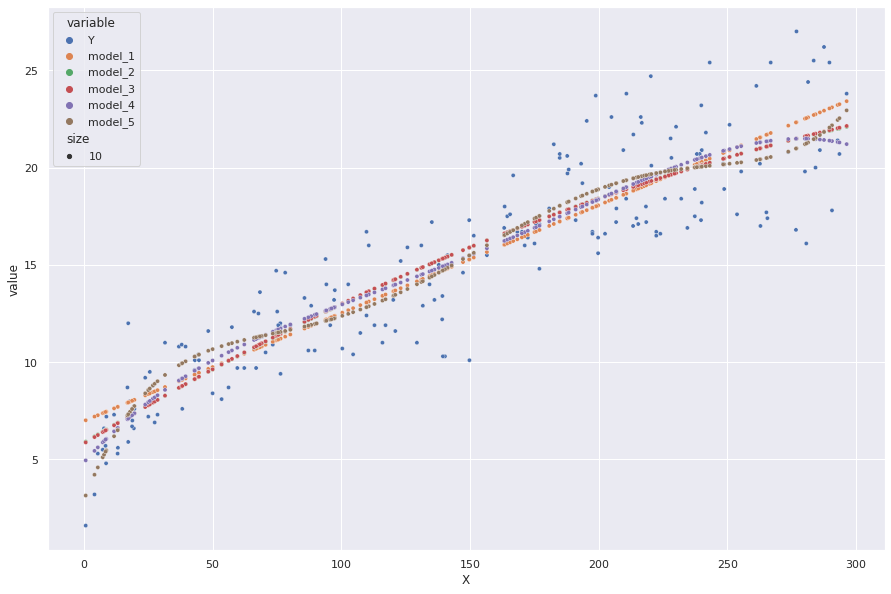

In [19]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=data_to_plot, x="X", y="value", hue="variable", size = "size");

<div class="div-dhds-fondo-1">Evaluación de modelos
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_separador.png" align="center" />

</div>

### $R^2$ ajustado

---

$R^2$ muestra qué tan bien se ajustan los datos a una curva o línea. 

El $R^2$ ajustado también indica qué tan bien se ajustan los términos a una curva o línea, pero **se corrige este número según la cantidad de variables predictoras del modelo**. 

Si agregamos variables inútiles a un modelo, el $R^2$ ajustado disminuirá. 

Si agregamos variables útiles  a un modelo, el $R^2$ ajustado aumentará.

El valos de $R^2$ ajustado siempre será menor o igual que $R^2$

Entonces en modelos de **regresión lineal multiple** debemos evaluar la calidad del ajuste con el valor de **$R^2$ ajustado**

$$R^2_{ajustado} = 1 - (1-R^2)\frac{n - 1}{n - p - 1}$$

### Métricas de evaluación para problemas de regresión

---

 Hay tres métricas de evaluación comunes para problemas de regresión:

**El error absoluto medio** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_ {i = 1}^n |y_i-\hat{y}_i|$$

**Error cuadratico medio** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_ {i = 1}^n(y_i- \hat{y}_i)^2$$

**Raiz del Error cuadrático medio** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i = 1}^n(y_i- \hat{y}_i)^2}$$

Todas estas son **funciones de pérdida**, por lo tanto queremos minimizarlas.

<div class="div-dhds-fondo-1"> Variables dummy
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_separador.png" align="center" />

</div>

### Features cualitativas / categóricas

---

A veces nos encontraremos con problemas de regresión lineal que presentan **predictores cualitativos** (variables categóricas nominales u ordinales).

Por ejemplo, para un dataset con datos sobre tarjetas de crédito donde la variable dependiente es el saldo de deuda, pueden ser útiles algunos predictores con estas características como:

* Género
* Estado Civil
* Si es estudiante o no



### Ejemplo

---

Estimemos diferencias entre el saldo de la tarjeta de crédito entre hombres y mujeres (ignorando el resto de las variables). 

Este es el caso de una regresión lineal simple con un predictor cualitativo.

Definimos una variable dummy $x_i$ tal que

<p style="font-size:20px;">
\begin{equation}
  x_i=\begin{cases}
    1, & \text{si la i-ésima persona es mujer}\\
    0, & \text{en otro caso}.
  \end{cases}
\end{equation}
</p>

Así, el modelo de regresión toma la siguiente forma

<p style="font-size:20px;">
\begin{equation}
  y_i = \beta_0 + \beta_1 . x_i + \epsilon_i = \begin{cases}
    \beta_0 + \beta_1 + \epsilon_i, & \text{si la i-ésima persona es mujer}\\
    \beta_0 + \epsilon_i, & \text{en otro caso}.
  \end{cases}
\end{equation}
</p>



Supongamos que para modelo anterior obtenemos

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_regresion_lineal_multiple_dummies.png" align="center"/>

¿Cómo interpretamos esto?


$\beta_0$ puede ser interpretado como el saldo promedio de los hombres

$\beta_0$ + $\beta_1$  expresa el  saldo promedio de las mujeres

$\beta_1$ expresa la diferencia media en el saldo entre ambos grupos

En la tabla anterior, el crédito medio entre hombres se estimó en $\$509,80$, el de las mujeres se estimó en $\$509,80 + \$19,73 = \$529,53$. Es decir, que hay una diferencia de $\$19,73$.

Sin embargo, observemos que el p-value del coeficiente estimado de la variable dummy es demasiado elevado. Esto indica que no parece haber evidencia de una diferencia significativa en el saldo promedio de crédito entre géneros.

La decisión de codificación es arbitraria, en caso de codificarlo al revés sólo cambiarían los valores de los coeficientes $\beta_0$ sería $\$529,53$ y $\beta_1$ sería $-\$19,73$ (negativo)


<div class="div-dhds-fondo-1"> Normalización
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_separador.png" align="center" />

</div>

### Normalización 

---

**¿Por qué normalizar?**

* Manejo de cantidades en **diferentes unidades o escalas**

* Muchos algoritmos de machine learning tienen la **normalización como requerimiento**


Muchos algoritmos de machine learning se basan en el cálculo de medidas de distancia, en este cálculo intervienen todas los features (variables predictoras) representando cada una de las coordenadas de la observación.

La medida de distancia que viene implementada por default es la distancia euclídea que requiere matemáticamente que todos los features sean numéricos. 

Para no favorecer a ningún feature en particular al calcular la distancia, debemos estandarizar y deshacernos de las unidades.



**¿Cómo normalizar?**

Existen algunas formas típicas de normalizar:

La **estandarización**: $x_{norm} = (x - \mu ) / \sigma$

La normalización **min-max**: $x_{norm} = (x - min) / (max - min)$

donde $min$, $max$ son el valor mínimo y máximo de la variable predictora respectivamente


La **elección** entre min-max y estandarización depende del objetivo del método:

**min-max**: Tiene sentido en los casos donde importa que los features tengan las mismas unidades pero no necesariamente la misma varianza

**estandarización***: Tiene sentido donde se necesita que los features tengan las mismas unidades y también la misma varianza, como por ejemplo en el análisis de componentes principales. 


#### En resumen

Usamos la normalización para:

* Manejo de cantidades en diferentes unidades o escalas

* Muchos algoritmos de machine learning tienen la normalización como requerimiento

* Puede aumentar la velocidad de convergencia usando el método de gradiente

Existen diferentes métodos de normalización, como 

* estandarización, 
* min-max 
* L1 y L2 (que veremos en la clase de regularización)


<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_22_Regresion_Lineal_Multiple/Presentacion/img/M3_CLASE_22_separador.png" align="center" />

</div>

### Ejercicio 

---

1. Teniendo en cuenta los valores de correlaciones entre las variables predictoras del dataset `advertising` ¿qué interacciones evaluaría para predecir la variable target Sales?

2. Escribamos la ecuación del modelo lineal a entrenar, que incluya las variables $TV$, $Radio$, $TV^2$, $Radio^2$, $Radio . TV$

3. Completemos el dataset `advertising` con las variables predictoras que vamos a incluir en el modelo

4. Usando sklearn.model_selection dividamos el conjunto de datos en train y test.

5. Usemos statsmodels para evaluar el p-value de cada uno de los coeficientes de la regresión. Quitando del modelo, de a una en orden de p-value decreciente, las variables predictoras cuyo coeficiente no es significativo.

6. Usando sklearn entrenemos un modelo lineal para predecir la variable Sales de acuerdo a la ecuación del punto anterior

7. Evaluemos la performance de ese modelo comparando MAE, MSE y RMSE en los conjuntos de train y test




### Solución

---

1. 

Teniendo en cuenta los valores de correlaciones entre las variables predictoras del dataset `advertising`, las que presentan correlación más alta son Newspaper con Radio, por otro lado habíamos visto que Newspaper no era significativo en la regresión lineal múltiple sin interacciones, por lo tanto decidimos no evaluar esa interacción en el modelo. Vamos a considerar la interacción $Radio . TV$

2. 

$$Sales = \beta_0 + \beta_1 . TV + \beta_2 . Radio + \beta_3 . TV^2 + \beta_4 . Radio^2 + \beta_5 . Radio . TV + \epsilon$$



3.

In [20]:
advertising_file_path = "../Data/advertising.csv"
advertising = pd.read_csv(advertising_file_path)
#advertising.head()

advertising["Radio_TV"] = advertising.Radio * advertising.TV
advertising["TV_TV"] = advertising.TV * advertising.TV
advertising["Radio_Radio"] = advertising.Radio * advertising.Radio



4.

In [21]:
from sklearn.model_selection import train_test_split

feature_cols = ['TV', 'Radio', 'Radio_TV', 'TV_TV', 'Radio_Radio']

X = advertising[feature_cols]
y = advertising.Sales

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=123)

5.

In [22]:
import statsmodels.api as sm

feature_cols = ['TV', 'Radio', 'TV_TV', 'Radio_Radio', 'Radio_TV']

X = Xtrain[feature_cols]
y = ytrain

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     405.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           6.45e-83
Time:                        18:44:17   Log-Likelihood:                -258.94
No. Observations:                 150   AIC:                             529.9
Df Residuals:                     144   BIC:                             547.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.0843      0.531      9.579      

El principio jerárquico plantea que si incluimos interacciones en un modelo también debemos incluir los efectos principales. En este caso, deberíamos quitar la variable predictora Radio porque su p-value es alto, pero vamos a conservarla porque el valor de p-value de Radio² y de Radio . TV son pequeños por lo tanto debemos mantener esos coeficientes en el modelo.

6. 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


feature_cols = ['TV', 'Radio', 'TV_TV', 'Radio_Radio', 'Radio_TV']

Xtrain_sklearn = Xtrain[feature_cols]
#deberiamos normalizar las features!! van a ver cómo hacerlo en la práctica guiada

model = LinearRegression(fit_intercept=True)

model.fit(Xtrain_sklearn, ytrain)

print(model.coef_)

print(model.intercept_)


[ 7.25212480e-02 -1.86956347e-02 -9.37168652e-05  1.50188750e-03
  3.89402444e-04]
5.084314081023869


7.

In [24]:
print("R2: ", model.score(Xtrain_sklearn, ytrain))

n = len(ytrain)
p = 5
ypred_train = model.predict(Xtrain_sklearn)
r2 = metrics.r2_score(ytrain, ypred_train)
r2_ajustado = 1 - (1 - r2)*((n-1)/(n - p - 1))

print("R2: ", metrics.r2_score(ytrain, ypred_train))
print("R2 ajustado: ", r2_ajustado)
print('Mean Absolute Error:', metrics.mean_absolute_error(ytrain, ypred_train))
print('Mean Squared Error:', metrics.mean_squared_error(ytrain, ypred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytrain, ypred_train)))

R2:  0.9336339778136846
R2:  0.9336339778136846
R2 ajustado:  0.9313296020433265
Mean Absolute Error: 1.0162796882982386
Mean Squared Error: 1.8489112463513229
Root Mean Squared Error: 1.35974675816908


In [25]:
Xtest_sklearn = Xtest[feature_cols]

print("R2: ", model.score(Xtest_sklearn, ytest))

n = len(ytest)
p = 5
ypred_test = model.predict(Xtest_sklearn)
r2 = metrics.r2_score(ytest, ypred_test)
r2_ajustado = 1 - (1 - r2)*((n-1)/(n - p - 1))

print("R2: ", metrics.r2_score(ytest, ypred_test))
print("R2 ajustado: ", r2_ajustado)
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

R2:  0.9371412504725474
R2:  0.9371412504725474
R2 ajustado:  0.9299982107535186
Mean Absolute Error: 0.9993515785418426
Mean Squared Error: 1.7281351197235606
Root Mean Squared Error: 1.3145855315359136


Las métricas obtenidas para train son parecidas a las obtenidas en test, por lo tanto consideramos que el modelo no tiene overfitting.

Si comparamos el valor de $R^2$ ajustado obtenido en este modelo con el modelo sin interacción y con el modelo sin variables al cuadrado, vemos que hay una mejora en el modelo que ajustamos en este ejercicio.

<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Referencias y Material Adicional

---

<a href="https://www.statlearning.com/" target="_blank">An Introduction to Statistical Learning</a>

<a href="https://www.econometrics-with-r.org/6-rmwmr.html" target="_blank">Regression Models with Multiple Regressors</a>

<a href="https://www.youtube.com/playlist?list=PL03F4F3BE94EB5CE9" target="_blank">Modelo Lineal</a>


